In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import glob 
import os
import datetime
from PyDictionary import PyDictionary
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 70)

In [192]:
# type:Person employments.{isCurrent:true title:"Software Engineer" employer.diffbotUri:"http://diffbot.com/entity/CHb0_0NEcMwyY8b083taTTw"}

companies_map = { # include employer.diffbotUri:
    "Accenture": "https://www.diffbot.com/entity/CCSWlgoj9O5qPbQW8JWdDMQ",
    "Amazon": "https://app.diffbot.com/entity/CU2HJUnMcNoWE3nR1cGBcZg" ,
    "AMEX": "https://app.diffbot.com/entity/C0WfaIUi8O5OJiCbVRwdj5Q",
    "Apple": "http://diffbot.com/entity/CHb0_0NEcMwyY8b083taTTw",
    "Coursera": "https://app.diffbot.com/entity/O3riEaNWePCq6lg3BvV8NBw",
    "Facebook": "https://app.diffbot.com/entity/Cg08yHNmgNRiif5mB-LHAyQ",
    "Google": "https://www.diffbot.com/entity/CUFq-3WlpNsq0pvfUYWXOEA",
    "Honey": "https://app.diffbot.com/entity/CoLspFVudPiOzJolZSl740w",
    "Hulu": "https://app.diffbot.com/entity/C1K2ux2TCOiGrJ0-wwuprcQ",
    "IBM": "https://www.diffbot.com/entity/CPdsrDmLiMQCskvBLp_dloQ",
    "Illumina": "https://app.diffbot.com/entity/CNCDiq_4MPkWqzPQwVbUyFg",
    "Instagram": "https://app.diffbot.com/entity/PEZ6-VdJBNNaNEU33MmvyAw",
    "Microsoft": "https://www.diffbot.com/entity/CIsFKrN_ZNLSWsvxdQfWutQ",
    "Netflix": "https://app.diffbot.com/entity/C9QcCMms9Ozy69yX2_IKUKw",
    "Pfizer": "https://www.diffbot.com/entity/CSBjRBGmsNUal0z-IBIlMTQ",
    "Qualcomm": "https://app.diffbot.com/entity/C-A4VGPCfN6eH77ZYlVgHhA",
    "Quora": "https://app.diffbot.com/entity/C8e1-u4wZO-6Ii-S6JrAbYQ",
    "SalesForce": "https://app.diffbot.com/entity/CSRC2KU5QOJ6rsk7VEjQRKQ",
    "SpaceX": "https://app.diffbot.com/entity/CluisPVnnNcGbFrFE_s2rYw",
    "Splunk": "https://app.diffbot.com/entity/C9lAI2DnXOmWFy5xwmxZtvg", 
    "Spotify": "https://app.diffbot.com/entity/Cggbb05L2Mn6qqNcfL-e5WA",
    "Square": "https://app.diffbot.com/entity/CA_l6NjCdMGOJY9DgBLjCBw",
    "TigerGraph": "https://app.diffbot.com/entity/CasjF7OHeM1ynXsg0Zv45OA", 
    "Twitter": "https://app.diffbot.com/entity/C1v2UkreyPXm7leKR5WspGw",     
}


In [193]:
hiringCompanies = pd.read_excel("Data/WeAreHiringDB_1.xlsm")
hiringCompanies = hiringCompanies[hiringCompanies["State"]=="California"]
hiringCompanies.reset_index(inplace=True, drop=True)
hiringCompanies.drop(hiringCompanies.loc[:, 'Unnamed: 10':].columns, axis = 1, inplace=True) 
hiringCompanies.set_index(["Company", "City"]);
hiringCompanies['Company'].unique()

array(['Adobe', 'Affirm, Inc.', 'Airbnb', 'Airtable', 'Airtime',
       'Alibaba Group', 'Amazon', 'Amazon Lab126',
       'Amazon Web Services (AWS)', 'AMD', 'AngelList', 'App Annie',
       'Apple', 'Argo AI', 'Asana', 'Aurora', 'Autodesk', 'Better.com',
       'BetterUp', 'BigPanda', 'Blend', 'Blizzard Entertainment',
       'Bloomberg LP', 'BlueVine', 'Box', 'Brex', 'brightwheel',
       'ByteDance', 'Carrot', 'Chime', 'Cisco', 'Citrix', 'Clari',
       'Clever', 'Clumio', 'Cohesity', 'Coinbase', 'Compology',
       'ConsumerTrack', 'Couchbase', 'Coupang', 'Course Hero', 'Coursera',
       'Credit Karma', 'Credit Sesame', 'Cruise', 'CVS Health',
       'Databricks', 'Deloitte', 'Digit', 'Discord', 'DoorDash',
       'Dropbox', 'Earnin', 'eBay', 'Etsy', 'Facebook', 'Figma', 'Google',
       'Grammarly', 'hims & hers', 'Honor', 'Houzz', 'HOVER', 'Huawei',
       'HubSpot', 'Instacart', 'Instagram', 'Intel', 'Intuit', 'InVision',
       'Invitae', 'Iterable', 'Juniper Square', 'Khan A

In [194]:
def create_education_dict(source):
    edHistory = {}
    for i in range(len(source)):
        if 'educations' not in source[i]:
            continue 
        key = source[i]['name']
        # edHistory[key] = [[majors], [institution], [from], [to]]
        edHistory[key] = {}
        n = len(source[i]['educations'])
        
        for e in source[i]['educations']:
            if 'degree' in e and 'name' in e['degree']:
                if e['degree']['name'] not in edHistory[key]:
                    edHistory[key][e['degree']['name']] = [[], [], [], []]
                    
                if 'major' in e and 'name' in e['major']: edHistory[key][e['degree']['name']][0].append(e['major']['name'])
                else: edHistory[key][e['degree']['name']][0].append(np.nan)
                        
                if 'institution' in e and 'name' in e['institution']: edHistory[key][e['degree']['name']][1].append(e['institution']['name'])
                else: edHistory[key][e['degree']['name']][1].append(np.nan)
                    
                if 'from' in e: edHistory[key][e['degree']['name']][2].append(e['from']['str'][1:5])
                else: edHistory[key][e['degree']['name']][2].append(np.nan)
                
                if 'to' in e: edHistory[key][e['degree']['name']][3].append(e['to']['str'][1:5])
                else: edHistory[key][e['degree']['name']][3].append(np.nan)
                
    return edHistory

def write_education_to_df(education_map, df, k, degree, **kwargs): 
    other_degree = kwargs.get('other_degree', None) # when degree type not in 'switcher' (next line)
    switcher = {
        'bachelors': "Bachelor's (4 year program)",
        'masters': "Master's (6 year program)",
        'phd': "PhD or other Doctorate"
    }

    df.loc[k]['major_{}'.format(degree)] = education_map[k][switcher.get(degree, other_degree)][0][0]
    df.loc[k]['institution_{}'.format(degree)] = education_map[k][switcher.get(degree, other_degree)][1][0]
    df.loc[k]['{}_start_date'.format(degree)] = education_map[k][switcher.get(degree, other_degree)][2][0]
    df.loc[k]['{}_end_date'.format(degree)] = education_map[k][switcher.get(degree, other_degree)][3][0]
    

In [195]:
def education_parser(source, df):
    bachelors = "Bachelor's (4 year program)"
    masters = "Master's (6 year program)"
    phd = "PhD or other Doctorate"
    education_map = create_education_dict(source)
    
    for k in education_map:
        
        if bachelors in education_map[k]:
            df.loc[k]['has_bachelors'] = True
            write_education_to_df(education_map, df, k, "bachelors")
            
        if masters in education_map[k]:
            df.loc[k]['has_bachelors'] = True
            df.loc[k]['has_masters'] = True
            write_education_to_df(education_map, df, k, "masters")
        
        if phd in education_map[k]:
            df.loc[k]['has_bachelors'] = True
            df.loc[k]['has_phd'] = True
            write_education_to_df(education_map, df, k, "phd")
            
        for degree_type in education_map[k].keys():
            if degree_type not in [bachelors, masters, phd]:
                write_education_to_df(education_map, df, k, "other", other_degree=degree_type)  
            
            
    df['has_masters'].fillna(False, inplace=True)
    df['has_phd'].fillna(False, inplace=True)

In [216]:
def employment_parser(source, df):
    for i in range(len(source)):
        key = source[i]['name']
        
        if key not in df.index.values:
            continue 
        df.loc[key]['current_title'] = source[i]['employments'][0]['title']
        df.loc[key]['current_company'] = source[i]['employments'][0]['employer']['name']
        if 'description' in source[i]:
            df.loc[key]['description'] = source[i]['description']
        
        if 'location' in source[i]['employments'][0]:
             if 'address' in source[i]['employments'][0]['location']:
                    df.loc[key]["current_company_location"] = source[i]['employments'][0]['location']['address']
        
        if 'from' in source[i]['employments'][0]:
            start_date = source[i]['employments'][0]['from']['str'][1:8]
            if start_date[5:] == 'XX': start_date = start_date[:4]
            df.loc[key]['from'] = pd.to_datetime(start_date)
            
        if 'to' in source[i]['employments'][0]:
            end_date = source[i]['employments'][0]['to']['str'][1:8]
            if end_date[5:] == 'XX': end_date = end_date[:4]
            df.loc[key]['to'] = pd.to_datetime(end_date)
        

        num_experiences = len(source[i]['employments'])
        
        j = 1
        while j < num_experiences and j < 6: 
            try:
                # employer and title 
                if 'employer' in source[i]['employments'][j]:
                    if 'name' in source[i]['employments'][j]['employer']:
                        df.loc[key]['prev_company_{}'.format(j)] = source[i]['employments'][j]['employer']['name']
                    if 'title' in source[i]['employments'][j]:
                        df.loc[key]['prev_title_{}'.format(j)] = source[i]['employments'][j]['title']
            except:
                print("j = {0}, n = {1}".format(j, num_experiences))
            
            # location of experience
            if 'location' in source[i]['employments'][j]:
                if 'address' in source[i]['employments'][j]['location']:
                    df.loc[key]["prev_exp_location_{}".format(j)] = source[i]['employments'][j]['location']['address']
            
            # from and to
            if 'from' in source[i]['employments'][j]: 
                start_date = source[i]['employments'][j]['from']['str'][1:8]
                if start_date[5:] == 'XX': start_date = start_date[:4]
                df.loc[key]['prev_exp_from_{}'.format(j)] = pd.to_datetime(start_date)
            if 'to' in source[i]['employments'][j]: 
                end_date = source[i]['employments'][j]['to']['str'][1:8]
                if end_date[5:] == 'XX': end_date = end_date[:4]
                df.loc[key]['prev_exp_to_{}'.format(j)] = pd.to_datetime(end_date)
                if 'from' in source[i]['employments'][j]:
                    df.loc[key]['prev_exp_duration_months_{}'.format(j)] = round((df.loc[key]['prev_exp_to_{}'.format(j)] - df.loc[key]['prev_exp_from_{}'.format(j)]).days/30) 
                    df.loc[key]['prev_exp_duration_years_{}'.format(j)] = round(df.loc[key]['prev_exp_duration_months_{}'.format(j)]/12)
            j += 1


In [197]:
def age(source, df):
    for i in range(len(source)):
        if 'age' not in source[i]:
            continue 
        key = source[i]['name']      
        if key not in df.index.values:
            continue
        df.loc[key]['age'] = source[i]['age']

In [198]:
def gender(source, df):
    for i in range(len(source)):
        try:
            if 'gender' not in source[i] or 'normalizedValue' not in source[i]['gender']:
                continue 
            key = source[i]['name']      
            if key not in df.index.values:
                continue
            df.loc[key]['gender'] = source[i]['gender']['normalizedValue']
        except:
            print(i)

In [212]:
def total_employment_summation(df):
    duration = ['prev_exp_duration_months_{}'.format(i) for i in range(1, 6)] 
    df['total_months_of_experience'] = df[duration].sum(axis=1)
    df['total_years_of_experience'] = round(df['total_months_of_experience']/12,2)


In [356]:
def my_json_to_csv(role, company, from_docker=True):
    if from_docker == False:
        file = "Data/{0}/{0}_{1}.json".format(role, company)
        with open(file) as fh:
            json_source = json.load(fh)
    else: 
        json_source = json_appender(role, company, new_json=False)

    names = set()
    duplicates = 0 
    print('len json_source = ', len(json_source))
    for i in range(len(json_source)):
        names.add(json_source[i]['name'])
    
    info_cols = ['name', 'age', 'gender', 'description',
                 'source_company', 'source_role','current_title', 'current_company', 
                 'current_company_location','from', 'to'] 
    
    # former employments
    for i in range(1, 6):
        info_cols.append('prev_title_{}'.format(i))
        info_cols.append('prev_company_{}'.format(i))
        info_cols.append('prev_exp_location_{}'.format(i))
        info_cols.append('prev_exp_from_{}'.format(i))
        info_cols.append('prev_exp_to_{}'.format(i))
        info_cols.append('prev_exp_duration_months_{}'.format(i))
        info_cols.append('prev_exp_duration_years_{}'.format(i))
        
    # former education
    info_cols.extend(['total_months_of_experience', 'total_years_of_experience', 'has_phd', 'major_phd', 'institution_phd', 'phd_start_date', 'phd_end_date',
                      'has_masters', 'major_masters', 'institution_masters', 'masters_start_date', 'masters_end_date',
                      'has_bachelors', 'major_bachelors', 'institution_bachelors', 'bachelors_start_date', 'bachelors_end_date',
                      'major_other', 'institution_other', 'other_start_date', 'other_end_date'])
    
    df = pd.DataFrame(index=names, columns=info_cols)
    df['source_company'] = company
    df['source_role'] = role
    df['name'] = df.index
          
    age(json_source, df)
    gender(json_source, df)
    employment_parser(json_source, df)
    education_parser(json_source, df)
    total_employment_summation(df)
    
    # write to csv
    df.to_csv('data/{0}/{0}_{1}.csv'.format(role, company))
    return df

In [368]:
df = my_json_to_csv('ML', 'Apple', from_docker=True)
#df.insert(df.columns.get_loc('prev_title_1'), 'prev_title_1_level', np.nan)


len json_source =  255


In [369]:
print("unique values = {}".format(df['prev_title_1'].nunique()))
df[((df['has_masters'] == False) & (df['has_phd'] == False))].__len__()

unique values = 177


50

In [309]:
def skills_json_to_df(role, company, from_docker = True, **kwargs):
    
    if from_docker == False:
        file = "Data/{0}/{0}_{1}.json".format(role, company)
        with open(file) as fh:
            json_source = json.load(fh)
    else: 
        json_source = json_appender(role, company, new_json=False)
        
    size = kwargs.get('size', None)
    all_skills = set()
    skills={}
    duplicates = 0 

    for i in range(len(json_source)):
        try:
            if json_source[i]['name'] not in skills:
                skills[json_source[i]['name']] = []
            else: 
                duplicates += 1
            if 'skills' in json_source[i].keys():
                for e in json_source[i]['skills']:
                    skills[json_source[i]['name']].append(e['name'].lower())
                    all_skills.add(e['name'].lower())
        except:
            print("i = {}".format(i))
    all      
    df = pd.DataFrame(index=skills.keys(), columns=sorted(all_skills))
    
    for key in skills.keys():
        df.loc[key]['name'] = key
        for e in skills[key]:
            df.loc[key][e] = 1
    
    df.loc[:,:] = df.loc[:,:].fillna(0)
    df.to_csv('Data/{0}/{0}_{1}_{2}.csv'.format(role, company, 'skills'))
    if size:
        return df.head(size)
    return df        

In [411]:
def top_skills(role, company, from_docker = True, n=30, plot=True):
    """ 
    returns the top n skills relavant to a certain position 
    """
    df_skills = skills_json_to_df(role, company, from_docker)
    df_skills_t = df_skills.T
    df_skills_t.insert(0, 'sum', df_skills_t.sum(axis=1))
    top_skills = df_skills_t.sort_values(by=['sum'], ascending=False)['sum'].head(n)
    
    if plot == True:
        fig = px.bar(top_skills, x=list(top_skills.keys()), y='sum', labels=dict(x="Skill", y="Count"))
        fig.update_layout(title_text="Top {0} skills from {1} employees {2} at {3}".format(n, len(df_skills), role, company))
        fig.show()
    return top_skills

In [472]:
s = top_skills('HR', 'Amazon', from_docker=True)

In [467]:
def previous_experience_length(role, company, from_docker = True, plot=True, prev_experience='total'):
    df = my_json_to_csv(role, company, from_docker)
    y = 'total_years_of_experience'
    if prev_experience != 'total':
        y = 'prev_exp_duration_years_{}'.format(prev_experience)
     
    fig = px.histogram(df, x=y)
    fig.update_layout(title_text="#years of experience from {0} {1} employees at {2}.".format(len(df), role, company))
    fig.show()

In [471]:
previous_experience_length('HR', 'Amazon', from_docker = True, plot=True, prev_experience='total')

len json_source =  1000


In [473]:
#df['prev_company_1'].value_counts()
def most_common_former_institution(role, company, from_docker = True, y='prev_company_1', n=15):
    df = my_json_to_csv(role, company, from_docker)
    print('Top {0} from {1} {2}s at {3}'.format(y, len(df), role, company))
    df[y].value_counts()[:n].plot(kind = 'barh')
    #fig = px.histogram(df, x=y)
    #fig.show()

len json_source =  2135
Top prev_company_2 from 1507 SoftwareEngineers at Google


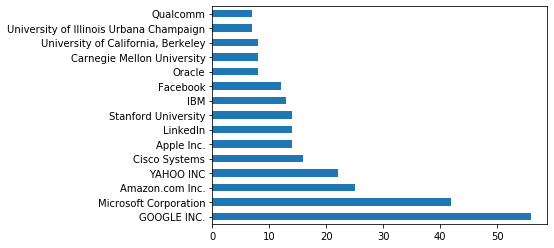

In [475]:
most_common_former_institution('SoftwareEngineer', 'Google', from_docker=False, y='prev_company_2')

In [14]:
def checkJsonSize(file):
    with open(file) as fh:
        l = json.load(fh)
        return len(l)

def checkNumUnique(file):
    keys = {}
    duplicates = []
    numDuplicates = 0
    
    with open(file) as fh:
        l = json.load(fh)
    
    for i in range(len(l)):
        if l[i]['name'] in keys:
            keys[l[i]['name']].append(i)
            duplicates.append(i)
            numDuplicates += 1
        else:
            keys[l[i]['name']] = [i]
    
    return (len(l) - numDuplicates, keys, duplicates)

In [48]:
def json_appender(role, company, new_json=False):
    path = "/Users/ratebkahhaleh/Desktop/HOP/Docker/{0}_{1}".format(company, role)
    master_list = []
    sizes = []
    for file in glob.glob(os.path.join(path, '*.json')): #only process .JSON files
        try:
            with open(file) as fh:
                l = json.load(fh)
                master_list.extend(l)
                sizes.append(len(l))
        except: 
            print('problematic file: {}'.format(file))

    if(new_json == True):
        with open('/Users/ratebkahhaleh/Desktop/HOP/Data/{0}/{0}_{1}.json'.format(role, company), 'w') as fh:
            json.dump(master_list, fh, indent=6)
        
    return master_list

In [16]:
def csv_concator(role):
    path = "/Users/ratebkahhaleh/Desktop/HOP/Data/{0}".format(role)
    df = pd.DataFrame()
    for file in glob.glob(os.path.join(path, '*.csv')): #only process .JSON files
        try:
            df = pd.concat([df, pd.read_csv(file, index_col='name')])
        except: 
            "There's an error with {}".format(file)
    if 'Unnamed: 0' in df:      
        df.drop(columns=['Unnamed: 0'], inplace = True)
    df.to_csv("/Users/ratebkahhaleh/Desktop/HOP/Data/All/{}.csv".format(role))
    return df

In [17]:
def directory_json_to_csv(role):
    path = "/Users/ratebkahhaleh/Desktop/HOP/Data/{}".format(role)
    for file in glob.glob(os.path.join(path, '*.json')): #only process .JSON files
        try:
            company = file.split('_')[1].split('.')[0]
            my_json_to_csv(role, company);
            skills_json_to_df(role, company);
            print('{} was processed'.format(file))
        except: 
            print('problematic file: {}'.format(file))

    

In [18]:
def json_inspect_education(file):
    bs = "Bachelor's (4 year program)"
    ms = "Master's (6 year program)"
    phd = "PhD or other Doctorate"
    education_map = {}
    education_count = {}
    no_education = 0 
    with open(file) as fh:
        source = json.load(fh)
    print('size of json file = {}'.format(len(source)))
    
    for i in range(len(source)):
        if 'educations' not in source[i]:
            no_education += 1
            continue 
        key = source[i]['name']     
        educations = source[i]['educations']
        education_map[key] = set([source[i]['educations'][j]['degree']['name'] for j in range(len(educations)) if 'degree' in source[i]['educations'][j] and 'name' in source[i]['educations'][j]['degree']])
        for j in range(len(education_map[key])):
            if 'degree' in source[i]['educations'][j] and 'name' in source[i]['educations'][j]['degree']:
                if source[i]['educations'][j]['degree']['name'] not in education_count:
                    education_count[source[i]['educations'][j]['degree']['name']]=1
                else:
                    education_count[source[i]['educations'][j]['degree']['name']]+=1
        
    print('# file w/o listed education = {}'.format(no_education))        
    return (education_map, education_count)


In [132]:
json_inspect_education('Data/SoftwareEngineer/SoftwareEngineer_Apple.json')[1]

size of json file = 900
prifile w/o listed education = 46


{"Master's (6 year program)": 323,
 "Bachelor's (4 year program)": 649,
 'Pre-Japanese': 1,
 'High School or Equivalent': 92,
 'B-Tech, EEE': 1,
 'Computer Science': 8,
 'PhD or other Doctorate': 45,
 'MCA': 2,
 'BTech': 1,
 'Certificate/License': 23,
 'Diploma, Astrophysics': 1,
 'Hospitality Administration/Management, Sophomore': 1,
 "Associate's (2 year program)": 22,
 'None': 3,
 'H.Dip ACT': 1,
 'Math': 1,
 'Bechelors': 1,
 'Communication, Human Computer Interaction': 1,
 'Mathematics; Computer Science, Software Engineering': 1,
 'Software Engineering/Full Stack Web Development': 1,
 'Diploma of College Studies': 1,
 'B-Tech': 1,
 'B Tech': 3,
 'Engineering': 2,
 'Engineer': 5,
 'Baccalaureate': 2,
 'Accelerator Program, Entrepreneurship/Entrepreneurial Studies': 2,
 'Datamatiker': 2,
 'HSC': 2,
 'BEng': 4,
 'Baccalauréat': 2,
 'Music Technology': 2,
 'Video Editing': 2,
 'Music': 2,
 'Nanodegree, Android Development': 2,
 'LEAD Corporate Innovation': 2,
 'worked': 2,
 '10+2': 2,


In [179]:
careers = ['Bioinformatics', 'DataEngineer', 'DataScientist', 'EPM', 'FullStack', 'ML', 'PM', 'QA',
            'Screener', 'SDET', 'SoftwareEngineer', 'SolutionsArchitect', 'TigerGraph']
for c in careers: 
    #directory_json_to_csv(c)
    csv_concator(c)
csv_concator('All');

,age,gender,description,source_company,source_role,current_title,current_company,current_company_location,from,to,prev_title_1,prev_company_1,prev_exp_location_1,prev_exp_from_1,prev_exp_to_1,prev_exp_duration_months_1,prev_exp_duration_years_1,prev_title_2,prev_company_2,prev_exp_location_2,prev_exp_from_2,prev_exp_to_2,prev_exp_duration_months_2,prev_exp_duration_years_2,prev_title_3,prev_company_3,prev_exp_location_3,prev_exp_from_3,prev_exp_to_3,prev_exp_duration_months_3,prev_exp_duration_years_3,prev_title_4,prev_company_4,prev_exp_location_4,prev_exp_from_4,prev_exp_to_4,prev_exp_duration_months_4,prev_exp_duration_years_4,prev_title_5,prev_company_5,prev_exp_location_5,prev_exp_from_5,prev_exp_to_5,prev_exp_duration_months_5,prev_exp_duration_years_5,has_phd,major_phd,institution_phd,phd_start_date,phd_end_date,has_masters,major_masters,institution_masters,masters_start_date,masters_end_date,has_bachelors,major_bachelors,institution_bachelors,bachelors_start_date,bachelors_end_date,major_other,institution_other,other_start_date,other_end_date
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mohamed Moussa,41.0,Male,EPM Manager - Hardware Technologies - Battery ...,Apple,EPM,EPM Manager - Hardware Technologies - Battery,Apple Inc.,"Cupertino, California",2017-09-01 00:00:00,NaN,Product Engineering Manager,Texas Instruments,NaN,2011-09-01 00:00:00,2017-09-01 00:00:00,73.0,6.0,"Staff Product Engineer, Mobile Devices Products",National Semiconductor,"Santa Clara, California",2010-11-01 00:00:00,2011-09-01 00:00:00,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,MS Electrical Engineering,San Jose State University,2004.0,2006.0,True,BS Electrical Engineering,San Francisco State University,1998.0,2002.0,NaN,NaN,NaN,NaN
Santosh Singh,42.0,Male,Santosh Singh is an EPM at APPLE INC and is ba...,Apple,EPM,EPM,Apple Inc.,"Cupertino, California",2014-01-01 00:00:00,NaN,Team Lead,BlackBerry Ltd,Dallas - Irving,2008-01-01 00:00:00,2013-01-01 00:00:00,61.0,5.0,Senior Software Engineer,Motorola Mobility,"Hyderabad Area, India",2005-01-01 00:00:00,2006-01-01 00:00:00,12.0,1.0,Senior Software Engineer,Aricent,NaN,2001-01-01 00:00:00,2005-01-01 00:00:00,49.0,4.0,Network Engineer,HCL,NaN,2000-01-01 00:00:00,2001-01-01 00:00:00,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,Electronics and Communication Engineering,"M.B.M. Engineering College, Jodhpur",1997.0,2000.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christine Ieong,31.0,Female,Proactively engages teams with an eagerness to...,Apple,EPM,Product Design EPM,Apple Inc.,"San Francisco, California",2018-03-01 00:00:00,NaN,Lead Project Engineer,Boeing,"Everett, Washington",2015-01-01 00:00:00,2016-03-01 00:00:00,14.0,1.0,Design Engineer,Boeing,NaN,2012-05-01 00:00:00,2014-09-01 00:00:00,28.0,2.0,Structural Engineering Intern,Permasteelisa,Singapore,2011-01-01 00:00:00,2011-08-01 00:00:00,7.0,1.0,Research Assistant,INTROMAC,"Cáceres, Cáceres, Spain",2010-01-01 00:00:00,2010-05-01 00:00:00,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,Civil Engineering,Iowa State University,2008.0,2012.0,Spanish Language and Literature,Universidad de Extremadura,2010.0,2010.0
Leanne Hughes-Bland,49.0,Female,"Engineering Program Manager, involved in a ran...",Apple,EPM,Release EPM,Apple Inc.,"Cupertino, California",2016-05-01 00:00:00,NaN,Managing Director,Actuarial Sparkle Ltd,"Southampton, City of Southampton, United Kingdom",2013-05-01 00:00:00,2014-07-01 00:00:00,14.0,1.0,Head of UK Pricing,Skandia,NaN,2011-01-01 00:00:00,2013-01-01 00:00:00,24.0,2.0,Actuarial Assistant,Skandia,NaN,1994-08-01 00:00:00,1999-12-01 00:00:00,65.0,5.0,Actuarial Assistant,BARCLAYS PLC,NaN,1993-07-01 00:00:00,1994-08-01 00:00:00,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,Mathematics with Actuarial Studies,University of Southampton,1990.0,1993.0,N

In [219]:
with open('Data/SoftwareEngineer/SoftwareEngineer_Apple.json') as fh:
    json_source = json.load(fh)

#create_education_dict(json_source)
json_source[0]['employments'][0]['location']['country']

{'summary': 'Country in North America',
 'image': 'https://kg.diffbot.com/image/api/get?fetch=yes&url=g%3Cj7P0St0DnBJf.x0KwLZrUn.%5B%3CR0Aa4Hh%3B%5Bv738ZqOr7U%3FfvEQ%3El%601Nw%7BM0Bf7hu7z%3FRe9s4XwGXedrKUAN%28%3D%5ECHnM%60%29.%7BOV',
 'types': ['Place', 'AdministrativeArea'],
 'name': 'United States of America',
 'diffbotUri': 'http://diffbot.com/entity/A01d4EK33MmCosgI2KXa4-A',
 'nbIncomingEdges': 923226326,
 'targetDiffbotUri': 'http://diffbot.com/entity/A01d4EK33MmCosgI2KXa4-A',
 'type': 'AdministrativeArea'}

In [196]:
google_df.columns

Index(['Unnamed: 0', 'name', 'age', 'gender', 'description', 'source_company',
       'source_role', 'current_title', 'current_company',
       'current_company_location', 'from', 'to', 'prev_title_1',
       'prev_company_1', 'prev_exp_location_1', 'prev_exp_from_1',
       'prev_exp_to_1', 'prev_exp_duration_months_1',
       'prev_exp_duration_years_1', 'prev_title_2', 'prev_company_2',
       'prev_exp_location_2', 'prev_exp_from_2', 'prev_exp_to_2',
       'prev_exp_duration_months_2', 'prev_exp_duration_years_2',
       'prev_title_3', 'prev_company_3', 'prev_exp_location_3',
       'prev_exp_from_3', 'prev_exp_to_3', 'prev_exp_duration_months_3',
       'prev_exp_duration_years_3', 'prev_title_4', 'prev_company_4',
       'prev_exp_location_4', 'prev_exp_from_4', 'prev_exp_to_4',
       'prev_exp_duration_months_4', 'prev_exp_duration_years_4',
       'prev_title_5', 'prev_company_5', 'prev_exp_location_5',
       'prev_exp_from_5', 'prev_exp_to_5', 'prev_exp_duration_months_5',

In [221]:
data = [[10, 10, 0], [10, 15, np.nan], [2, 14, 4]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['A', 'B', 'C']) 
df

,A,B,C
0,10,10,0.0
1,10,15,NaN
2,2,14,4.0


In [222]:
df['D'] = df[['A', 'C']].sum(axis=1) 
df

,A,B,C,D
0,10,10,0.0,10.0
1,10,15,NaN,10.0
2,2,14,4.0,6.0


In [223]:
mask = df[['A', 'B']]
df['F'] = mask.sum(axis=1)
df.insert(2, 'B+', [np.nan, 0, 0])

In [225]:
df.columns.get_loc("B+")

2

In [226]:
for i in range()

,A,B,B+,C,D,F
0,10,10,NaN,0.0,10.0,20
1,10,15,0.0,NaN,10.0,25
2,2,14,0.0,4.0,6.0,16
